In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

          director_name  count
1749   Steven Spielberg     26
2560        Woody Allen     22
997      Clint Eastwood     20
920     Martin Scorsese     20
227        Ridley Scott     17
2177         Tim Burton     16
1429          Spike Lee     16
4484  Steven Soderbergh     16
591        Renny Harlin     15
2768       Oliver Stone     14


Text(0, 0.5, 'Gross Earnings')

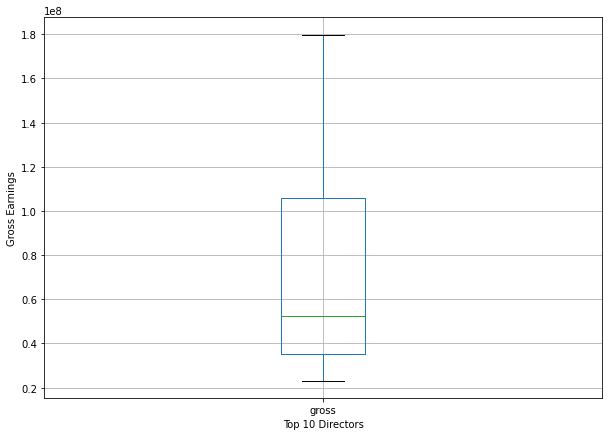

In [50]:
#Recopy dataset from original to new dataset to avoid altering of information
data1 = data
#Add new column "count" where its values are the number of occurrences of the director names per movie title
data1["count"] = data1.groupby("director_name")["movie_title"].transform(pd.Series.count)
#Sort the values by the highest count of occurrence
data1.sort_values("count", inplace=True, ascending=False)

#Remove the Duplicates of all the Director names with "0" as name
topdir = data1.drop_duplicates(subset="director_name", keep="first", inplace=False, ignore_index=False)
#print the Top 10 Directors with most movies
print(topdir[["director_name","count"]][1:11])
#create the Figure for the boxplot
fig = plt.figure(figsize =(10, 7))
#assign values for the boxplot
forboxplot = topdir[["gross","director_name"]][1:11]
#create boxplot
forboxplot.boxplot()
#create the Labels
plt.xlabel("Top 10 Directors")
plt.ylabel("Gross Earnings")


## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

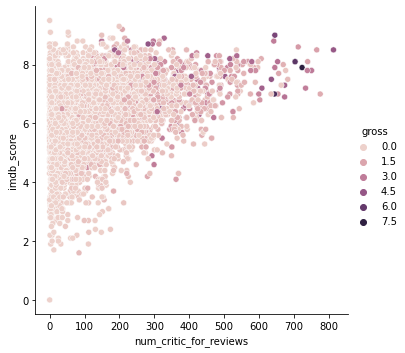

In [6]:
#Simply plot the for the 3 variaables given
sns.relplot(x = "num_critic_for_reviews", y ="imdb_score", hue = "gross", data=data)
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [7]:
#Recopy dataset from original to new dataset to avoid altering of information
data2 = data
#sort values of new dataset
data2 = data.sort_values("Unnamed: 0", inplace=False, ascending=True)
# Compute the Sales
data2["sales"] = data2["gross"] - data2["budget"]
data2["sales"]

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64

## Which directors garnered the most total sales?

In [32]:
#sort values by top sales
topsalesdirector = data2.sort_values("sales", inplace=False, ascending=False)
#remove duplicates of Director Names
topsalesdirector.drop_duplicates(subset="director_name", keep="first", inplace=True, ignore_index=False)
#print output
topsalesdirector[["director_name","sales"]]

,director_name,sales
0,James Cameron,5.235058e+08
29,Colin Trevorrow,5.021773e+08
3024,George Lucas,4.499357e+08
3080,Steven Spielberg,4.244495e+08
17,Joss Whedon,4.032795e+08
...,...,...
3273,Anurag Basu,-5.983975e+08
3851,Carlos Saura,-6.983127e+08
4542,Takao Okawara,-9.899626e+08
3423,Katsuhiro Ôtomo,-1.099561e+09


## Plot sales and average likes as a scatterplot. Fit it with a line.

Text(0.5, 1.0, 'Scatter Plot of Sales and Average like')

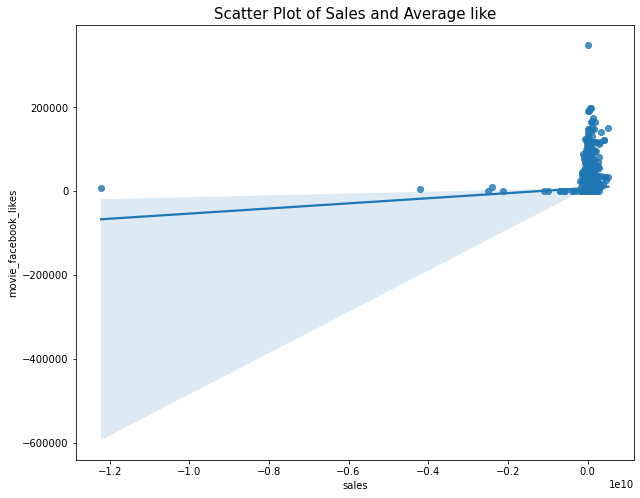

In [49]:
data3 = data2
#create figure for plot
plt.figure(figsize=(10,8))
#create plot
sns.regplot(x="sales",y = "movie_facebook_likes", data=data3)
#creat title
plt.title("Scatter Plot of Sales and Average like", fontsize=15)

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

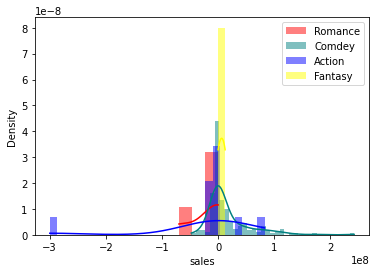

In [45]:
data4 = data3
ax = sns.histplot(data4[data4['genres'] == "Romance"]["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data4[data4['genres'] == "Comedy"]["sales"], color="teal", label="Comdey", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data4[data4['genres'] == "Action"]["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data4[data4['genres'] == "Fantasy"]["sales"], color="yellow", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

## Copying the whole dataframe

In [47]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,count
4517,4517,b'Wolf Creek ',Color,0,2.0,0.0,0.0,206.0,John Jarratt,511.0,...,English,Australia,0,0.0,0.0,457.0,7.1,2.00,954.0,104
4482,4482,b'The Girlfriend Experience ',Color,0,19.0,27.0,0.0,201.0,Riley Keough,934.0,...,English,USA,TV-MA,0.0,0.0,691.0,7.3,0.00,632.0,104
4288,4288,b'Get Real ',Color,0,1.0,60.0,0.0,143.0,Jon Tenney,11000.0,...,English,USA,0,0.0,0.0,289.0,7.3,1.33,43.0,104
4327,4327,b'Wings ',Color,0,19.0,30.0,0.0,424.0,Tim Daly,685.0,...,English,USA,0,0.0,0.0,511.0,7.3,1.33,1000.0,104
2828,2828,b'The Border ',Color,0,1.0,41.0,0.0,2.0,Marian Dziedziel,70.0,...,Polish,Poland,0,0.0,0.0,2.0,7.4,0.00,64.0,104


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [48]:
from pandas.api.types import is_numeric_dtype

#for loop to check each column if has numeric values
for column in df:
    if is_numeric_dtype(df[column]):
        max = df[column].max()
        min = df[column].min()
        df[column] = (df[column] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,count
4517,0.895697,b'Wolf Creek ',Color,0,0.002460,0.000000,0.000000,0.008957,John Jarratt,0.000798,...,English,Australia,0,0.000000,0.000000,0.003336,0.747368,0.125000,0.002734,1.0
4482,0.888757,b'The Girlfriend Experience ',Color,0,0.023370,0.142857,0.000000,0.008739,Riley Keough,0.001459,...,English,USA,TV-MA,0.000000,0.000000,0.005044,0.768421,0.000000,0.001811,1.0
4288,0.850288,b'Get Real ',Color,0,0.001230,0.317460,0.000000,0.006217,Jon Tenney,0.017188,...,English,USA,0,0.000000,0.000000,0.002109,0.768421,0.083125,0.000123,1.0
4327,0.858021,b'Wings ',Color,0,0.023370,0.158730,0.000000,0.018435,Tim Daly,0.001070,...,English,USA,0,0.000000,0.000000,0.003730,0.768421,0.083125,0.002865,1.0
2828,0.560777,b'The Border ',Color,0,0.001230,0.216931,0.000000,0.000087,Marian Dziedziel,0.000109,...,Polish,Poland,0,0.000000,0.000000,0.000015,0.778947,0.000000,0.000183,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,0.530637,b'Disturbing Behavior',Color,David Nutter,0.118081,0.444444,0.005174,0.039913,Ethan Embry,0.001545,...,English,Australia,R,0.001228,0.991071,0.007168,0.578947,0.115625,0.001928,0.0
3341,0.662502,b'The Haunting in Connecticut 2: Ghosts of Geo...,Color,Tom Elkins,0.097171,0.534392,0.000609,0.024304,Cicely Tyson,0.001563,...,English,USA,R,0.000737,0.998512,0.006620,0.557895,0.146875,0.000000,0.0
2519,0.499504,b'How She Move',Color,Ian Iqbal Rashid,0.076261,0.497354,0.000348,0.002870,Clé Bennett,0.000513,...,English,Canada,PG-13,0.000000,0.995536,0.000891,0.347368,0.115625,0.000682,0.0
3339,0.662106,b'The DUFF',Color,Ari Sandel,0.162362,0.534392,0.000739,0.018652,Romany Malco,0.054688,...,English,USA,PG-13,0.000696,0.999504,0.007051,0.684211,0.146875,0.022923,0.0
